In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [19]:
# defining state for the graph
class QuadState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [14]:
# creating show equation function
def show_equation(state: QuadState):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {"equation": equation}

In [15]:
# creating discriminant function
def calculate_discriminant(state: QuadState):
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = b**2 - 4*a*c
    
    return {"discriminant": discriminant}

In [ ]:
# creating root type functions
def real_roots(state: QuadState):
    root1 = (-state['b'] + state['discriminant']**0.5) / (2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5) / (2*state['a'])
    result = f"Real roots: {root1} and {root2}"
    return {"result": result}

def equal_roots(state: QuadState):
    root = -state['b'] / (2*state['a'])
    result = f"Equal roots: {root}"
    return {"result": result}

def complex_roots(state: QuadState):
    result = "No real roots exist."
    return {"result": result}

In [21]:
def check_condition(state: QuadState) -> Literal['real_roots', 'equal_roots', 'complex_roots']:
    if state['discriminant'] > 0:
        return 'real_roots'
    elif state['discriminant'] == 0:
        return 'equal_roots'
    else:
        return 'complex_roots'

In [22]:
graph = StateGraph(QuadState)

# adding nodes
graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)

graph.add_node("real_roots", real_roots)
graph.add_node("equal_roots", equal_roots)
graph.add_node("complex_roots", complex_roots)

# adding edges 
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")

graph.add_conditional_edges("calculate_discriminant", check_condition)


graph.add_edge("real_roots", END)
graph.add_edge("equal_roots", END)
graph.add_edge("complex_roots", END)

#compilinig the graph
workflow = graph.compile()

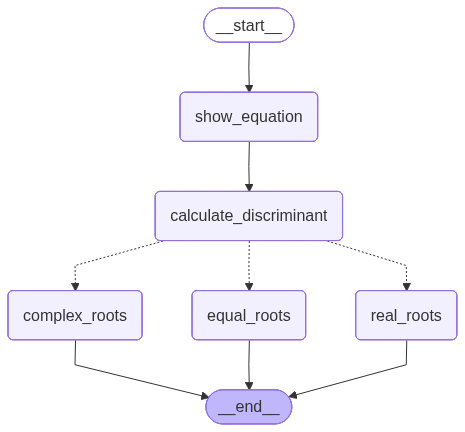

In [23]:
workflow


In [24]:
# initial state
initial_state: QuadState = {
    "a": 1,
    "b": -3,
    "c": 2,
    "equation": "",
    "discriminant": 0.0,
    "result":""
}

In [25]:
workflow.invoke(initial_state)

{'a': 1,
 'b': -3,
 'c': 2,
 'equation': '1x^2 + -3x + 2 = 0',
 'discriminant': 1,
 'result': 'Real roots: 2.0 and 1.0'}

In [1]:
print("Creating a state graph...")

Creating a state graph...
